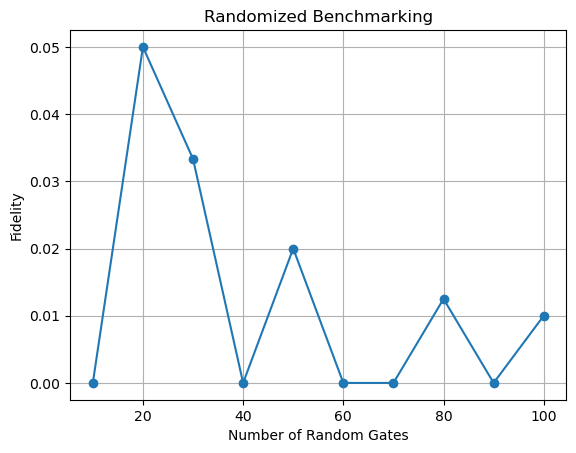

In [7]:
# Import necessary Qiskit modules
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Set the number of qubits
num_qubits = 1
# Define a range of numbers of random gates to apply
gate_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize a list to store the fidelity results
fidelity_results = []

for num_gates in gate_counts:
    # Create a quantum circuit with the specified number of qubits
    circ = QuantumCircuit(num_qubits, num_qubits)

    # Perform randomized benchmarking
    for _ in range(num_gates):
        gate_choice = np.random.choice(['x', 'h'], p=[0.5, 0.5])  # Randomly choose X or H gate
        if gate_choice == 'x':
            circ.x(0)  # Apply X gate
        else:
            circ.h(0)  # Apply H gate

    # Measure the final state
    circ.measure(range(num_qubits), range(num_qubits))

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ, simulator, shots=1)
    result = job.result()
    counts = result.get_counts()

    # Calculate fidelity (for simplicity, it's calculated as the probability of measuring '0' state)
    fidelity = counts.get('0', 0) / num_gates

    # Store the fidelity result
    fidelity_results.append(fidelity)

# Plot the fidelity results
plt.plot(gate_counts, fidelity_results, marker='o')
plt.xlabel('Number of Random Gates')
plt.ylabel('Fidelity')
plt.title('Randomized Benchmarking')
plt.grid(True)
plt.show()